# Chromosome 22: Creating a Geographic Map of Genetic Variation

This project is inspired by the study titled [Genes mirror geography within Europe](https://www.nature.com/articles/nature07331) by Novembre *et al.* and similarly aims to uncover the influence of ancestry on genotype and population data from chromosome 22 downloaded from the [The International Genome Sample Resource](https://www.internationalgenome.org/). 

Importing required packages

In [12]:
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import altair as alt

In [30]:
%matplotlib inline

Importing the matrix previously created in *vcf_to_matrix.py* based on vcf file data

In [2]:
df = pd.read_csv('matrix.csv')
df

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [3]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace = True)
df

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [6]:
non_snp_columns = ['Population code', 'Sample']

In [54]:
df_snps = df.drop(non_snp_columns, axis =1) #dropping string columns to allow generation of matrix

In [8]:
matrix = df_snps.to_numpy() #regenerate matrix from dataframe
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

### Principal Component Analysis
variables = variant ids will be grouped together into two principal components based on similarities and stochastic independence
The aim is to achieve linear dimensionality reduction to preserve data with higher variation
1. Standardize data since PCA's output is influenced based on the scale of features of the data
2. use sklearn.decomposition for running PCA with (n_components = 2)
3. run .fit and .transform to aggregate the data

In [9]:
pca = decomposition.PCA(n_components = 2)
pca.fit(matrix)

PCA(n_components=2)

In [34]:
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')
print(pca.singular_values_)

Explained variation per principal component: [0.08253525 0.05412034]
[188.93732058 152.99536559]


From the output above we can deduct that principal component 1 holds 8.25 % of the information while principal component 2 holds 5 % of the information.

In [11]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

In [28]:
to_plot

array([[ 0.31282717,  5.35434923],
       [-0.67940259,  6.18332942],
       [-0.42071017,  5.26671964],
       ...,
       [ 0.20043966,  4.43755036],
       [ 0.11973266,  4.95993682],
       [-0.28688807,  3.46617335]])

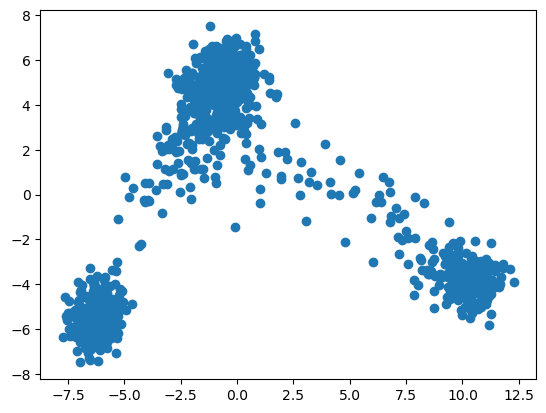

In [31]:
# to_plot[:,0] selects all rows (:) of the to_plot matrix and only the first column (0 index), 
# to_plot[:,1] selects all rows and second column
plt.scatter(x = to_plot[:,0], y = to_plot[:, 1])

In [14]:
# using altair as there are less than 5000 rows, making use of enhanced visualisation features

# first building a dataframe for plotting
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [15]:
df_plot['PC1'] = to_plot[:,0]
df_plot['PC2'] = to_plot[:,1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273755
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [18]:
alt.Chart(df_plot).mark_point().encode(
    x = 'PC1',
    y = 'PC2',
    color = alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

C:\Users\anna-\anaconda3\envs\April24pythonR\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\anna-\anaconda3\envs\April24pythonR\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [29]:
# importing population info from https://www.internationalgenome.org/data-portal/population
population = pd.read_csv('igsr_populations.tsv', sep = '\t')
population

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,FIN,FIN,Finnish,Finnish in Finland,60.17000,24.930000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,BEB,BEB,Bengali,Bengali in Bangladesh,23.70000,90.350000,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.40000,-66.100000,AMR,American Ancestry,#710027,2,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,KinhSGDP,Kinh,Kinh in Vietnam (SGDP),21.00000,105.900000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
208,NaN,IranianSGDP,Iranian,Iranian in Iran (SGDP),35.60000,51.500000,NaN,West Eurasia (SGDP),#001f54,19,Simons Genome Diversity Project
209,NaN,ItelmanSGDP,Itelman,Itelman in Russia (SGDP),57.00000,157.000000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project
210,NaN,EsanSGDP,Esan,Esan in Nigeria (SGDP),6.50000,6.000000,NaN,Africa (SGDP),#12eeff,13,Simons Genome Diversity Project


In [25]:
#merging population info with dataframe to reduce country information in plot to superpopulation
df_plot_merged = df_plot.merge(population, on='Population code', how='inner')
df_plot_merged

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273755,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [23]:
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273755
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [27]:
alt.Chart(df_plot_merged).mark_point().encode(
    x = 'PC1',
    y = 'PC2',
    color = alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

C:\Users\anna-\anaconda3\envs\April24pythonR\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\anna-\anaconda3\envs\April24pythonR\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\anna-\anaconda3\envs\April24pythonR\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C

alt.Chart(...)

<Figure size 640x480 with 0 Axes>

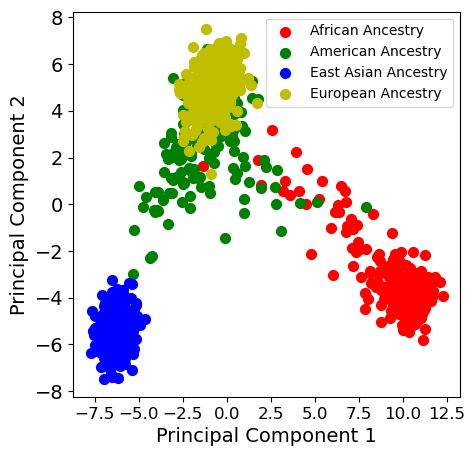

In [40]:
# plotting similar plot with matplotlib
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
targets = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry', 'European Ancestry']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicestokeep = df_plot_merged['Superpopulation name'] == target
    plt.scatter(df_plot_merged.loc[indicestokeep, 'PC1'],
                df_plot_merged.loc[indicestokeep, 'PC2'], c = color, s = 50)

plt.legend(targets)
plt.show()

## Results

From the above graphs it can be interestingly observed that the analyzed single nucleotide polymorphisms found on human chromosome 22 which were collected within the 1000 genomes project show a distinct clustering and overlap pattern: Patients with similar ancestry are clustered together. SNPs recorded from patients with european ancestry strongly overlap with american ancestry. Variants recorded from patients with african ancestry show an overlap tendency with individuals from american ancestry whereas east asian ancestry patients seem to not overlap at all.

Additionally, PC1 reveals higher variation than PC2. Therefore, differences among clusters of the PC1 axis are actually larger than differences on PC2. However, after inspecting the propotrtion of variance for each principal component, it was found that both principal component 1 (holds 8.25 % of the information) and principal component 2 (holds 5 % of the information) only hold a low ratio. In detail, the explained variance ratios provide insights into how much information each principal component captures from the original dataset. Higher ratios indicate that the corresponding principal component retains more information about the dataset's variability. Thus, the relative importance of each PC is hinting that the effectiveness in dimensionality reduction was low. For improvement, one could choose more principal components or assess the matter in tSNE plots. s

# tSNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
X = matrix
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [43]:
#adding tSNE info to dataframe
df_plot_merged['tSNE1'] = X_embedded[:,0]
df_plot_merged['tSNE2'] = X_embedded[:,1]
df_plot_merged.head(5)

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tSNE1,tSNE2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",21.046404,0.122954
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",15.335148,1.033408
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",13.993855,-4.967159
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",15.949338,3.531528
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",15.030570,0.616842


<Figure size 640x480 with 0 Axes>

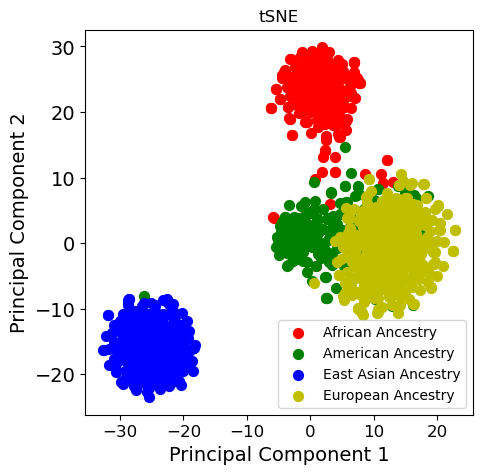

<Figure size 640x480 with 0 Axes>

In [55]:
# plotting similar plot with matplotlib
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
plt.title('tSNE')
targets = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry', 'European Ancestry']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicestokeep = df_plot_merged['Superpopulation name'] == target
    plt.scatter(df_plot_merged.loc[indicestokeep, 'tSNE1'],
                df_plot_merged.loc[indicestokeep, 'tSNE2'], c = color, s = 50)

plt.legend(targets)
plt.show()


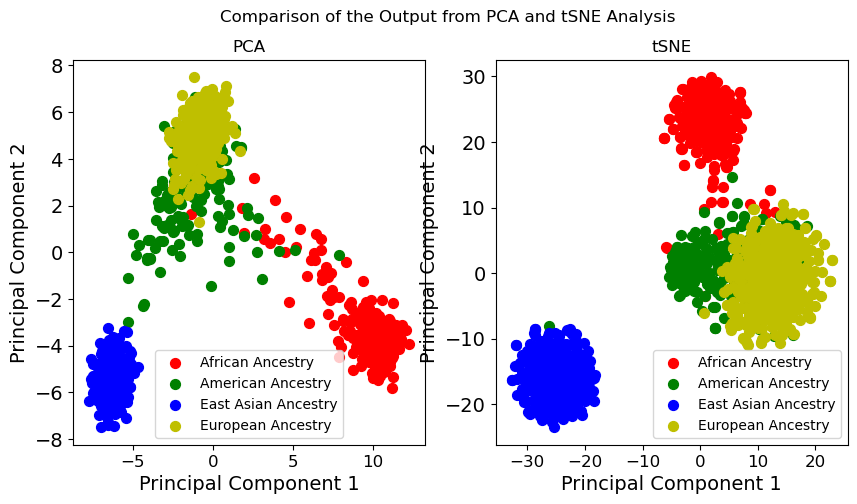

In [59]:
# comparing PCA plot and tSNE plot
#subplot(number of lines, number of columns, position)

fig = plt.figure(figsize=(10,5))



plt.subplot(1, 2, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
plt.title('PCA')
targets = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry', 'European Ancestry']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicestokeep = df_plot_merged['Superpopulation name'] == target
    plt.scatter(df_plot_merged.loc[indicestokeep, 'PC1'],
                df_plot_merged.loc[indicestokeep, 'PC2'], c = color, s = 50)

plt.legend(targets)

plt.subplot(1,2,2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
plt.title('tSNE')
targets = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry', 'European Ancestry']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicestokeep = df_plot_merged['Superpopulation name'] == target
    plt.scatter(df_plot_merged.loc[indicestokeep, 'tSNE1'],
                df_plot_merged.loc[indicestokeep, 'tSNE2'], c = color, s = 50)

plt.legend(targets)

fig.suptitle('Comparison of the Output from PCA and tSNE Analysis')
plt.savefig('PCA_and_tSNE_analysis_comparison.png')
plt.show()